# Visualizing Regularization of LeNet Trained on MNIST

In this notebook I visualize LeNet models trained on the MNIST dataset using various regularization techniques. The LeNet model and the MNIST dataset were set up as in Hoffman 2019 (for all the models). The MNIST data is preprocessed by normalizing using mean 0.1307 and variance 0.3081. The batch size is 100. The model optimizes using SGD with momentum p = 0.9, and standard cross-entropy loss. Model parameters are initialized using Glorot initialization (See Glorot & Bengio 2010), expect for SVB regularization which uses orthogonal initialization. Models are trained with no regularization, L2 regularization, SVB regularization and Jacobian regularization, both with and without dropout with a dropout rate of p_drop = 0.5. The L2 regularization coefficient and Jacobian regularization coefficient are the same as in Hoffman 2019: l2_lmbd = 0.0005 and lambda_jacobian_reg = 0.01. For SVB regularization I use the hyperparameters svb_freq=600 and svb_eps = 0.05. The learning rate starts at 0.1, and is reduced to 0.01 and 0.001 1/3 and 2/3s into training, respectively. The models are trained for 250 epochs.

### Imports and Model Loading

In [1]:
import jupyter_black
import torch
from torchsummary import summary

from data_generators import data_loader_MNIST
from model_classes import LeNet_MNIST
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_activations_pca,
    plot_decision_boundary,
    plot_and_print_img,
    generate_random_vectors,
    get_random_img,
    plot_fgsm,
    plot_pgd,
    plot_multiple_pgd,
)
from tools import ModelInfo

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST data
train_loader, test_loader = data_loader_MNIST()

# Summary of model
summary_model = LeNet_MNIST().to(device)
summary(summary_model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
           Dropout-6                  [-1, 120]               0
            Linear-7                   [-1, 84]          10,164
           Dropout-8                   [-1, 84]               0
            Linear-9                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
---------------------------------------------

In [3]:
# Load models
dataset = "mnist"
model_names = [
    "model_no_reg_0",
    "model_no_reg_no_dropout_0",
    "model_l2_0",
    "model_l2_no_dropout_0",
    "model_jacobi_0",
    "model_jacobi_no_dropout_0",
    "model_svb_0",
    "model_svb_no_dropout_0",
    "model_jacobi_and_svb_0",
    "model_all_0",
    "model_jacobi_and_l2_0",
    "model_svb_and_l2_0",
]
models = {name: ModelInfo(name, dataset) for name in model_names}

UnboundLocalError: cannot access local variable 'model' where it is not associated with a value

### Plots of Accuracy Curves

In [ ]:
for model_name in model_names:
    if model_name.startswith("model_no_reg"):
        plot_results(models, model_name, title = f"{model_name}")
    else:
        plot_reg_results(models, model_name, title=f"{model_name}")
    

### Plots of PCA

In [ ]:
for model_name in model_names:
    print(f"PCA of each layer in {model_name}")
    plot_activations_pca(models[f"{model_name}"].model, train_loader, device)

### Plots of Decision Boundaries

In [ ]:
for model_name in model_names:
    image = get_random_img(test_loader)
    v1, v2 = generate_random_vectors(image)
    plot_and_print_img(image, models[f"{model_name}"].model, device, f"{model_name}")
    plot_decision_boundary(
        models[f"{model_name}"].model, image, v1, v2, device, title=f"{model_name}"
    )

### Plots of Results of FGSM Attack

FGSM Attack Against Model: model_no_reg_0


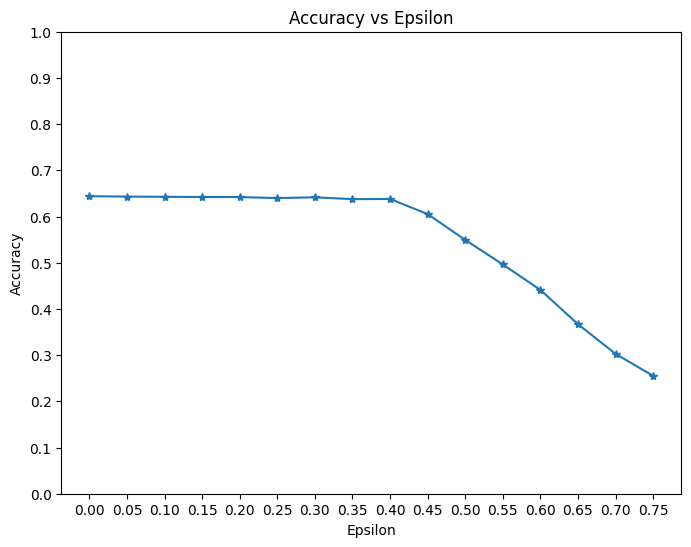

FGSM Attack Against Model: model_no_reg_no_dropout_0


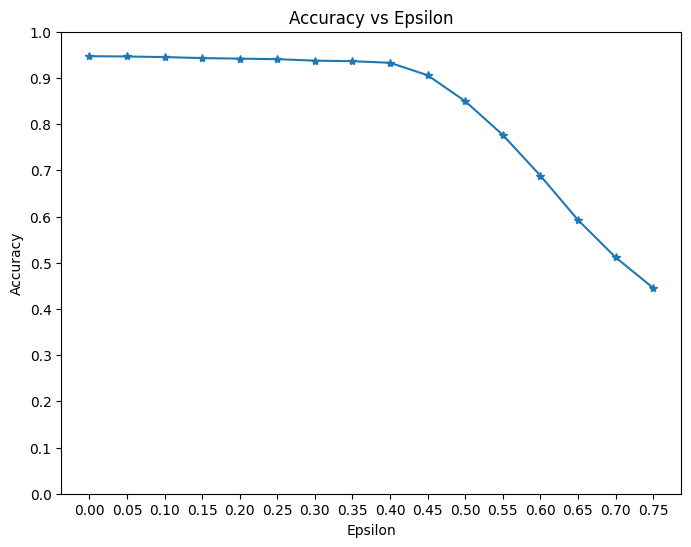

FGSM Attack Against Model: model_l2_0


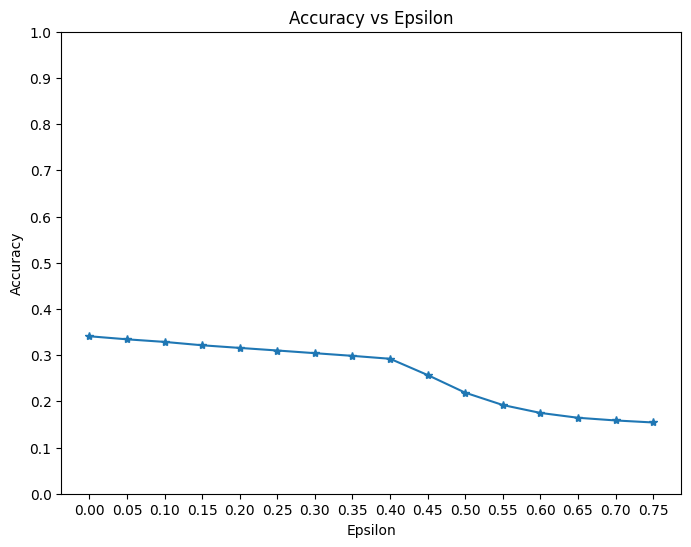

FGSM Attack Against Model: model_l2_no_dropout_0


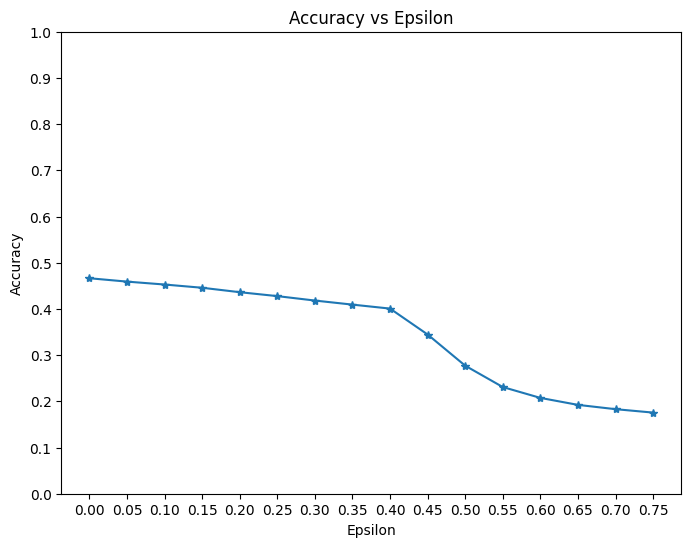

FGSM Attack Against Model: model_jacobi_0


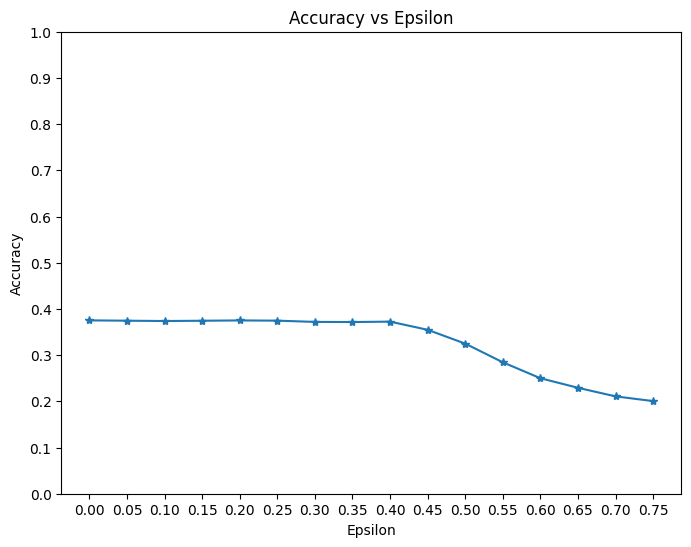

FGSM Attack Against Model: model_jacobi_no_dropout_0


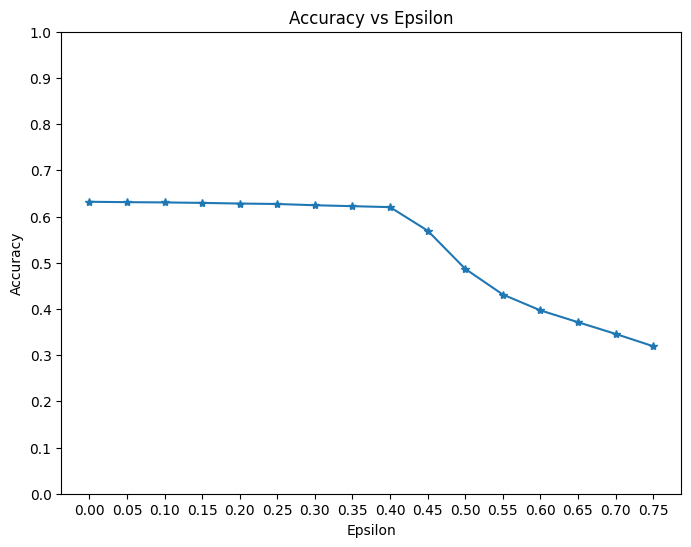

FGSM Attack Against Model: model_svb_0


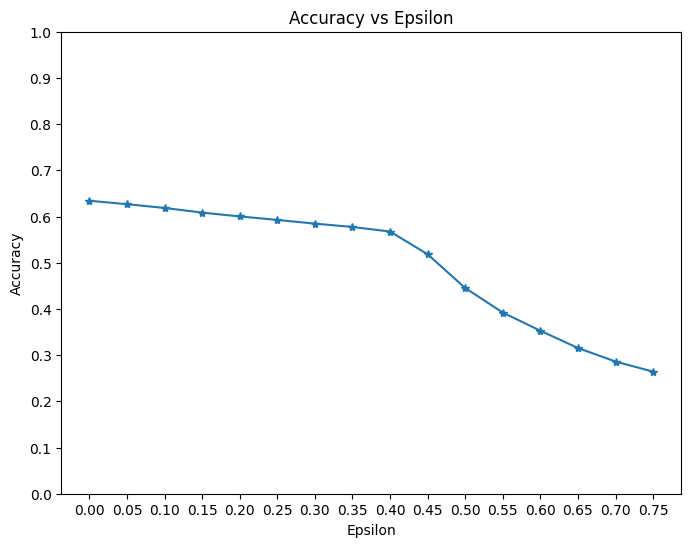

FGSM Attack Against Model: model_svb_no_dropout_0


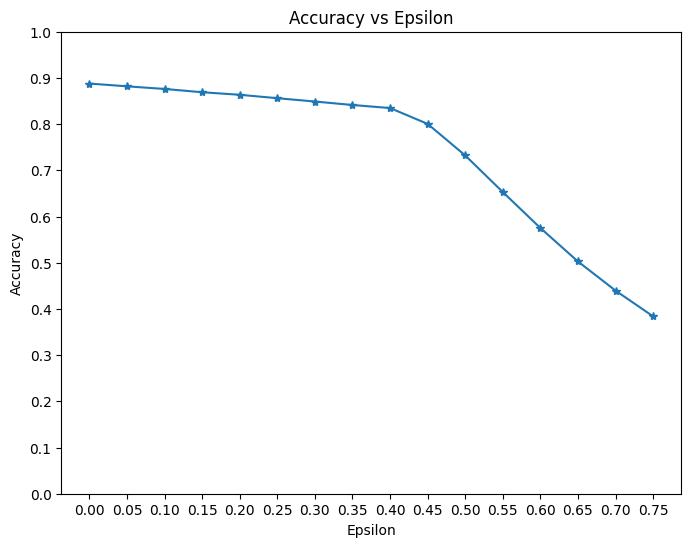

FGSM Attack Against Model: model_jacobi_and_svb_0


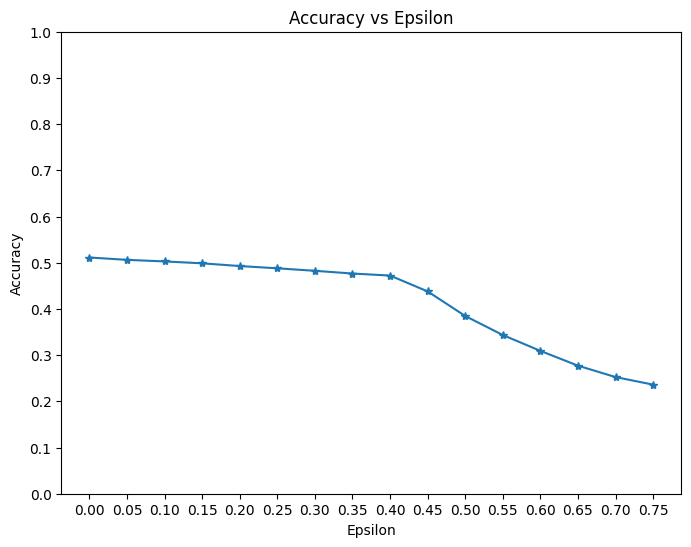

FGSM Attack Against Model: model_jacobi_and_l2_0


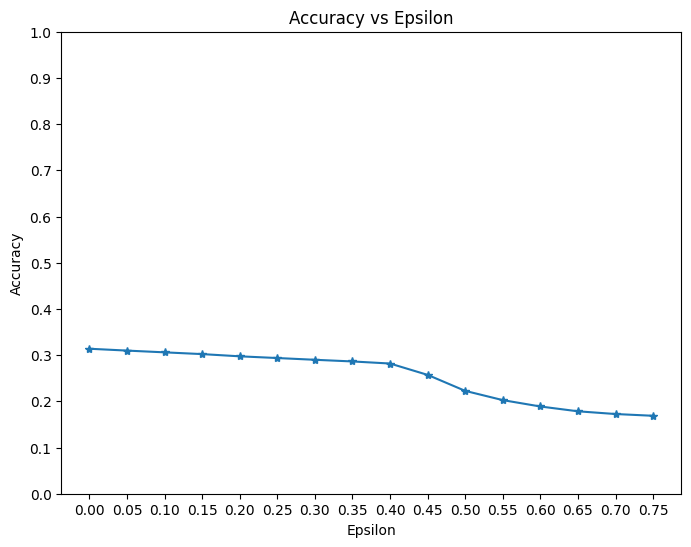

FGSM Attack Against Model: model_svb_and_l2_0


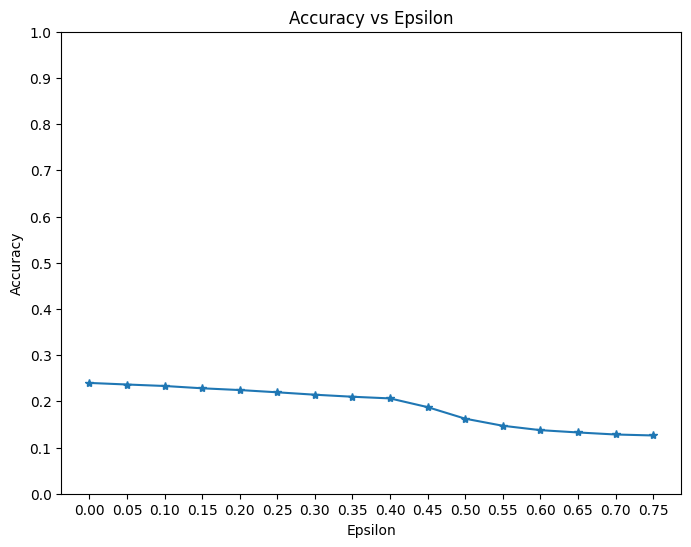

In [5]:
for model_name in model_names:
    print(f"FGSM Attack Against Model: {model_name}")
    plot_fgsm(models[f"{model_name}"].model, model_name, device, test_loader, dataset)

### Plots of Results of PGD Attack

PGD Attack Against Model: model_no_reg_0


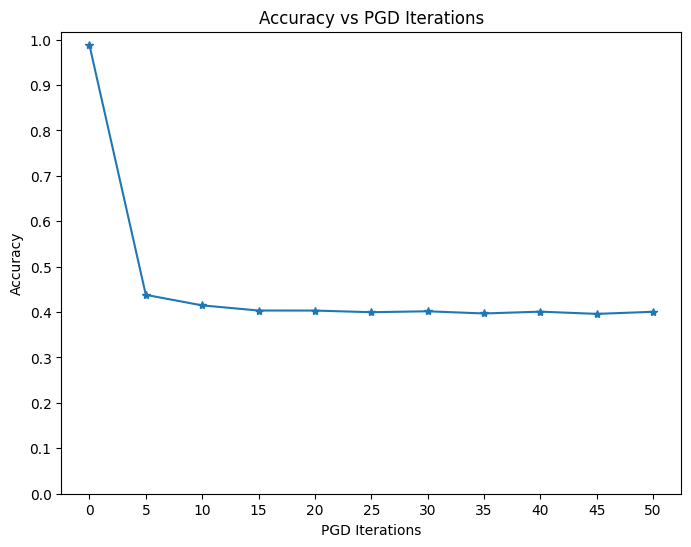

PGD Attack Against Model: model_no_reg_no_dropout_0


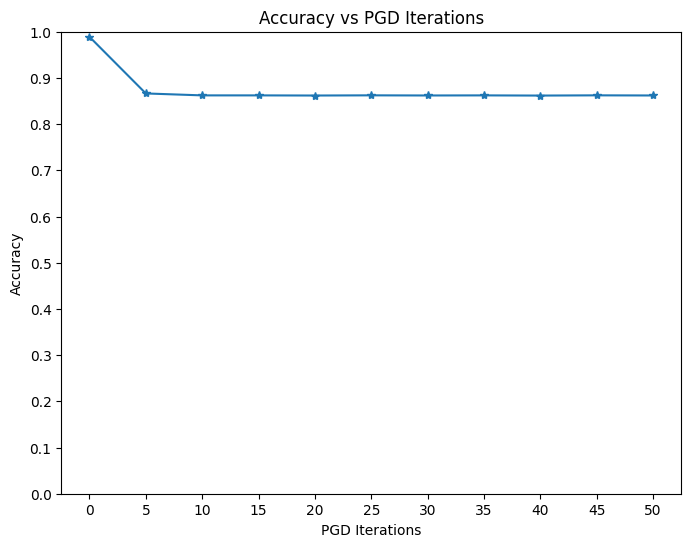

PGD Attack Against Model: model_l2_0


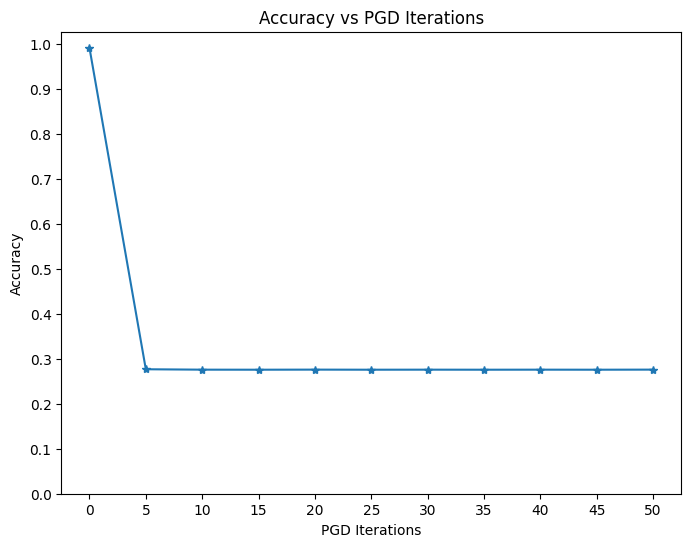

PGD Attack Against Model: model_l2_no_dropout_0


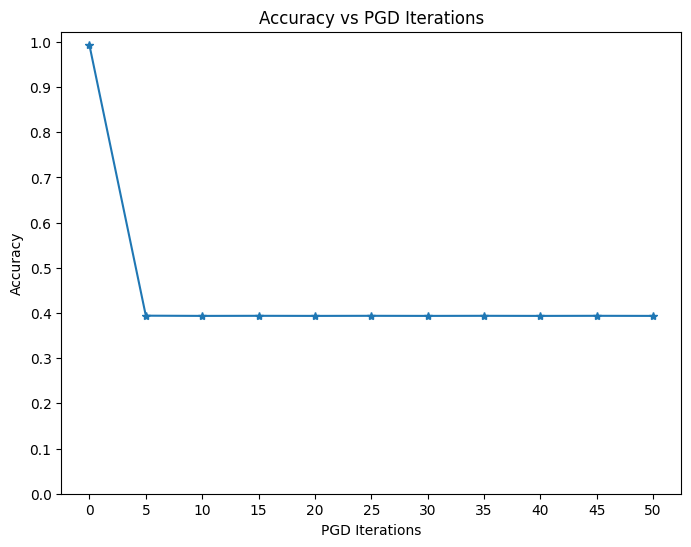

PGD Attack Against Model: model_jacobi_0


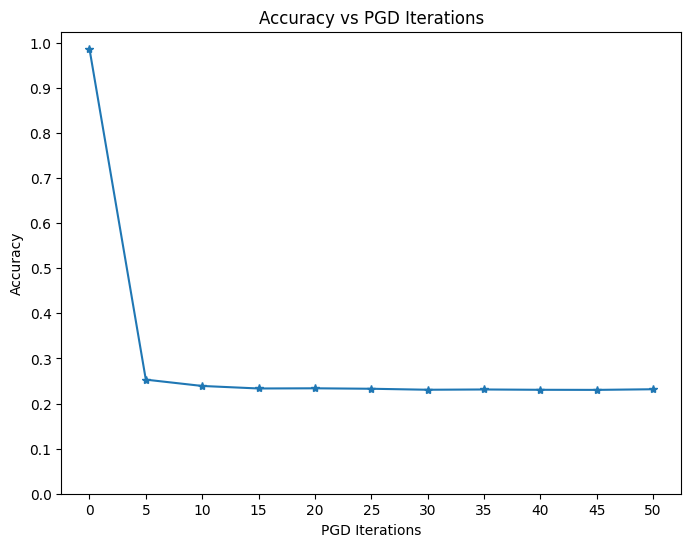

PGD Attack Against Model: model_jacobi_no_dropout_0


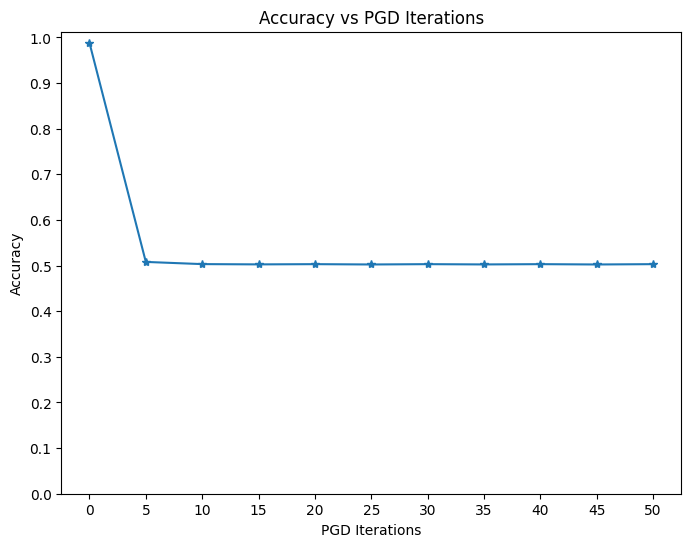

PGD Attack Against Model: model_svb_0


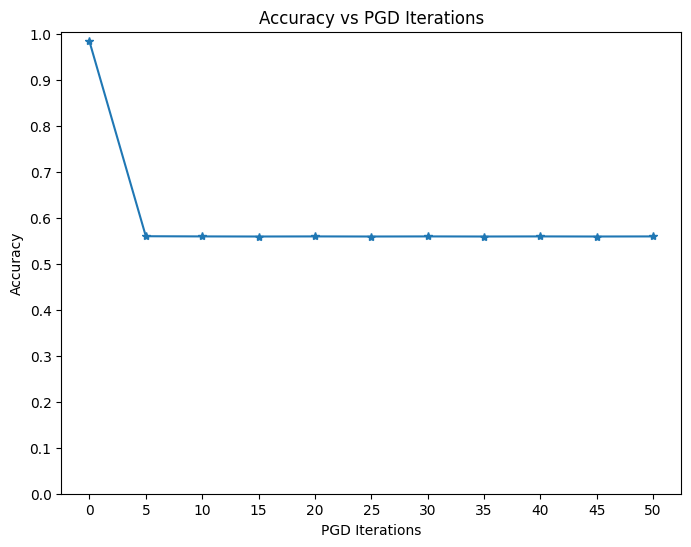

PGD Attack Against Model: model_svb_no_dropout_0


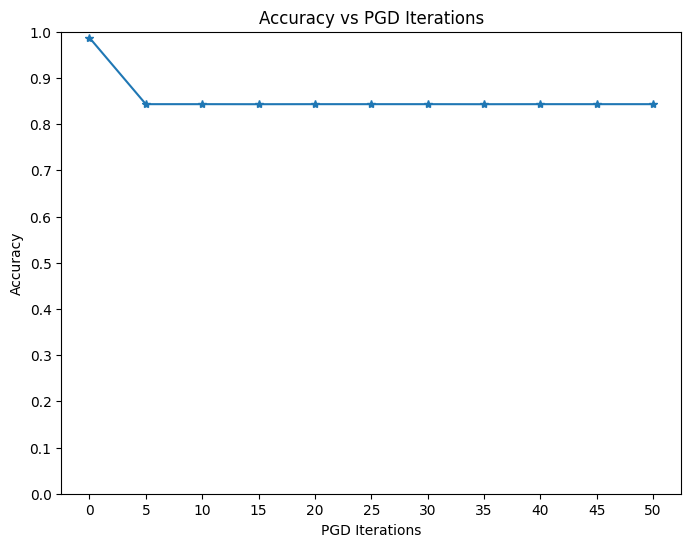

PGD Attack Against Model: model_jacobi_and_svb_0


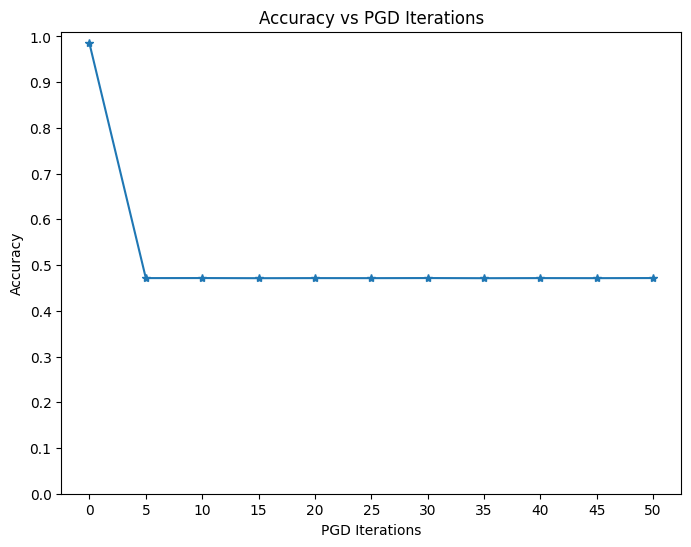

PGD Attack Against Model: model_jacobi_and_l2_0


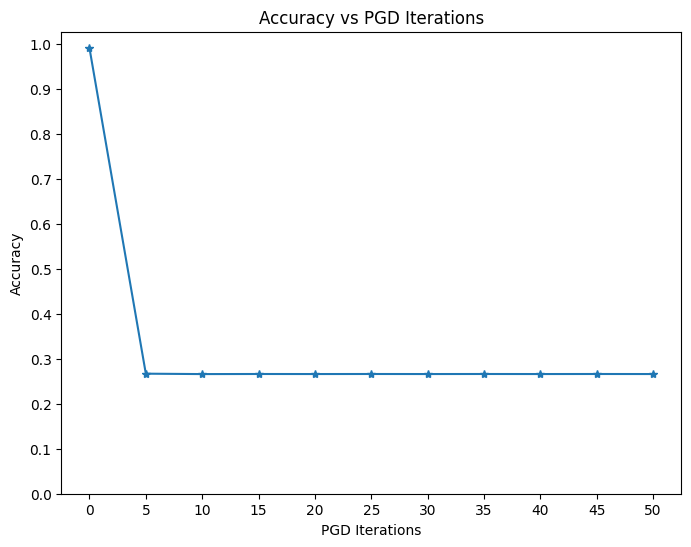

PGD Attack Against Model: model_svb_and_l2_0


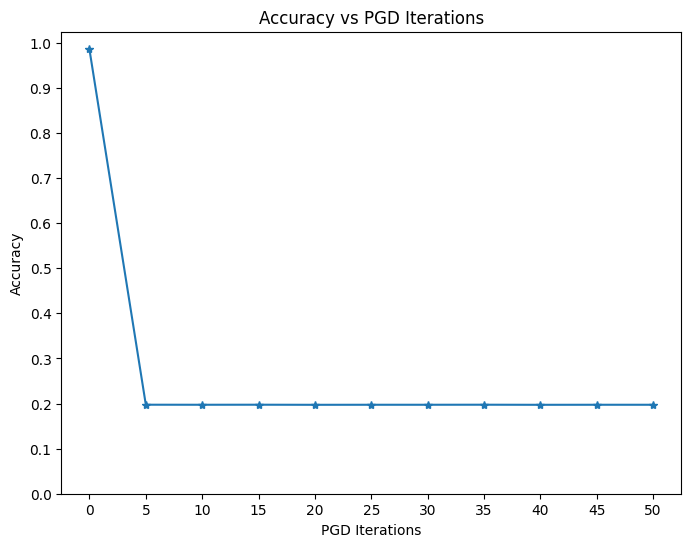

In [4]:
for model_name in model_names:
    print(f"PGD Attack Against Model: {model_name}")
    plot_pgd(
        models[f"{model_name}"].model,
        model_name,
        device,
        test_loader,
        dataset,
    )

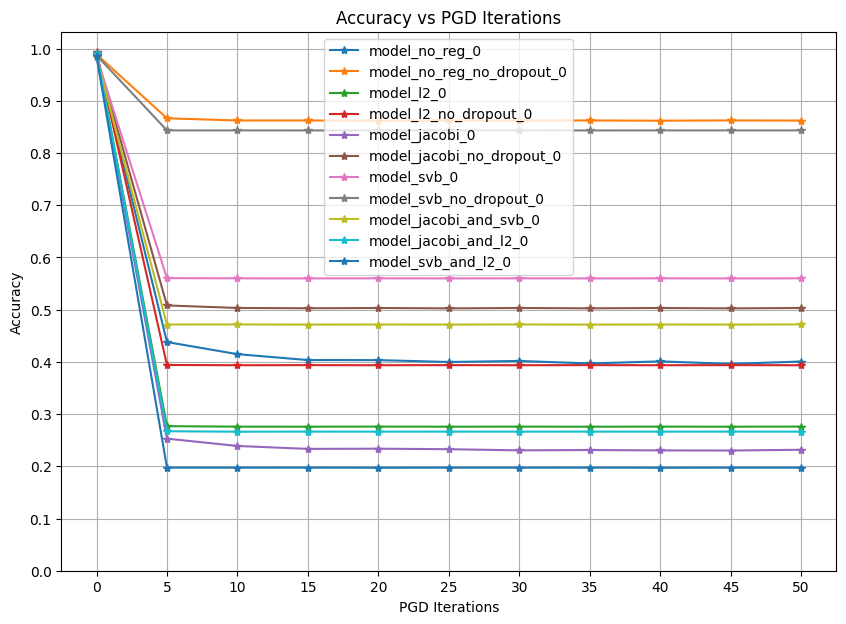

In [5]:
plot_multiple_pgd(models, model_names, device, test_loader, dataset)